<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [3]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1.0 Variable Identification

In [4]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [5]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

In [6]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


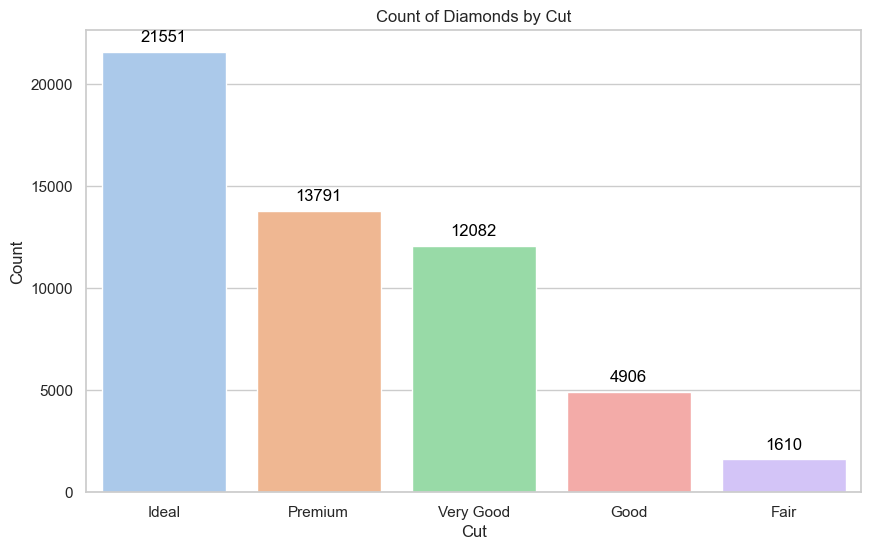

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar chart for the 'cut' variable with custom colors
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=diamonds, x='cut', order=diamonds['cut'].value_counts().index, palette='pastel')
plt.title('Count of Diamonds by Cut')
plt.xlabel('Cut')
plt.ylabel('Count')

# Show the number at the top of the bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.show()


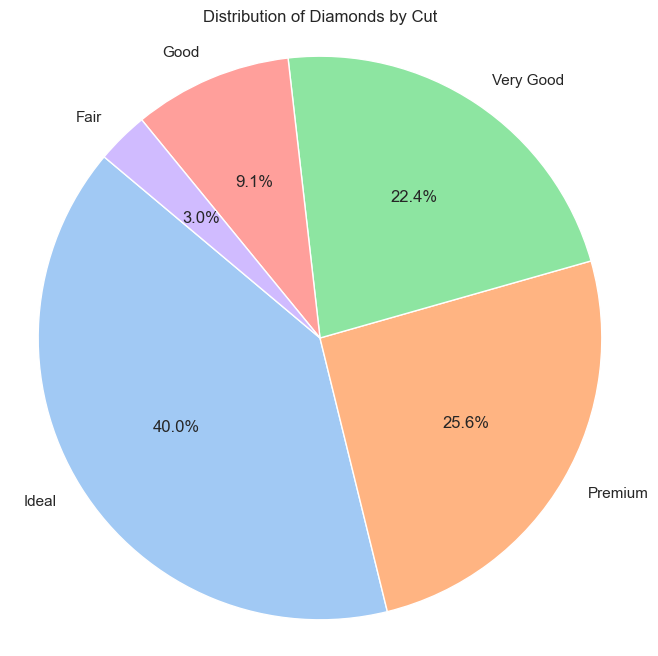

In [11]:
# Create a pie chart for the 'cut' variable
plt.figure(figsize=(8, 8))
cut_counts = diamonds['cut'].value_counts()
plt.pie(cut_counts, labels=cut_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Diamonds by Cut')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


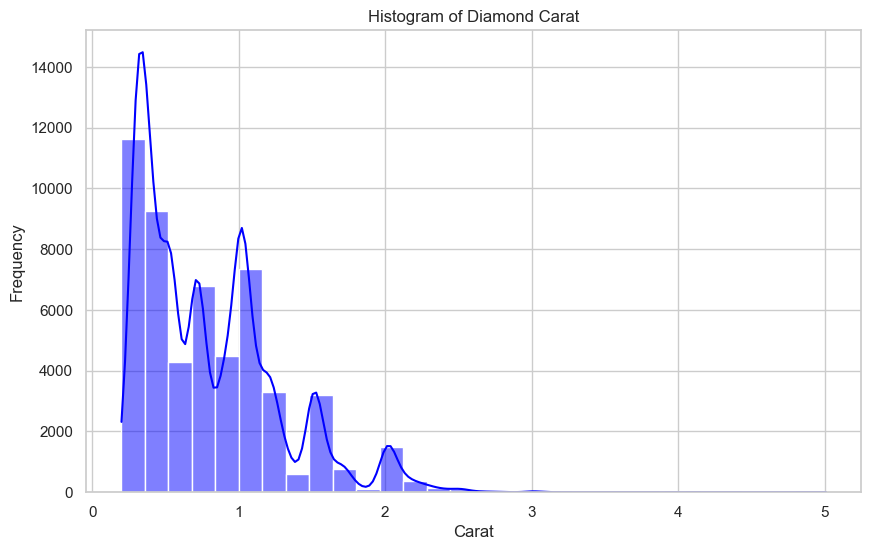

In [12]:
# Create a histogram for the 'carat' variable
plt.figure(figsize=(10, 6))
sns.histplot(diamonds['carat'], bins=30, kde=True, color='blue')
plt.title('Histogram of Diamond Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


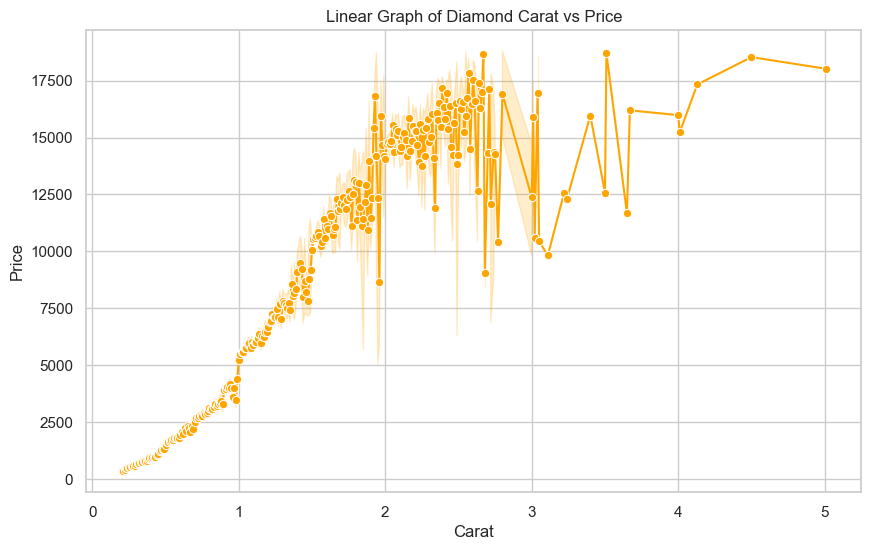

In [13]:
# Create a linear graph for the 'carat' vs 'price' variables
plt.figure(figsize=(10, 6))
sns.lineplot(data=diamonds, x='carat', y='price', marker='o', color='orange')
plt.title('Linear Graph of Diamond Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()


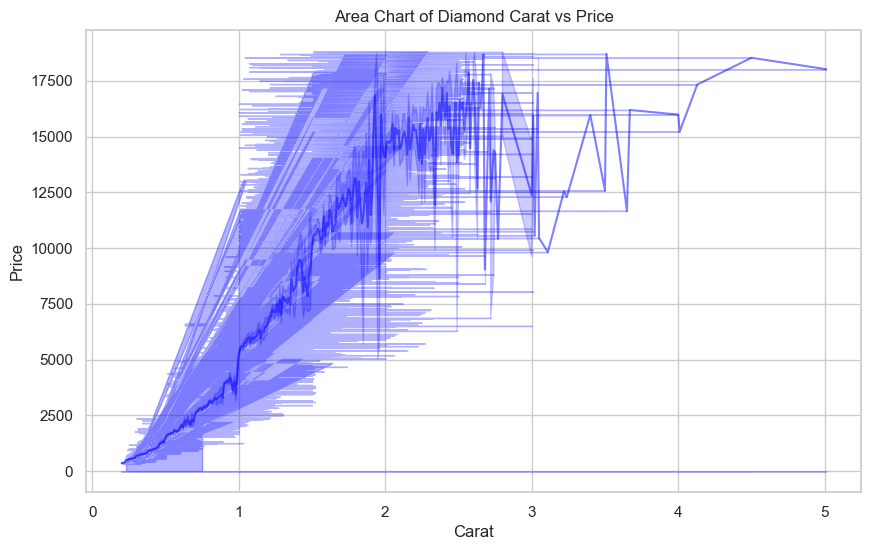

In [16]:


# Create an area chart for the 'carat' vs 'price' variables
plt.figure(figsize=(10, 6))
sns.lineplot(data=diamonds, x='carat', y='price', color='blue', alpha=0.5)
plt.fill_between(diamonds['carat'], diamonds['price'], color='blue', alpha=0.3)
plt.title('Area Chart of Diamond Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(True)
plt.show()


### 2.2 For categorical variables: frequency table, count plot

In [18]:
frequency_tables = {
    'cut': diamonds['cut'].value_counts(),
    'color': diamonds['color'].value_counts(),
    'clarity': diamonds['clarity'].value_counts()
}

# Display frequency tables
for variable, frequency in frequency_tables.items():
    print(f"Frequency table for {variable}:\n{frequency}\n")


Frequency table for cut:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

Frequency table for color:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

Frequency table for clarity:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64



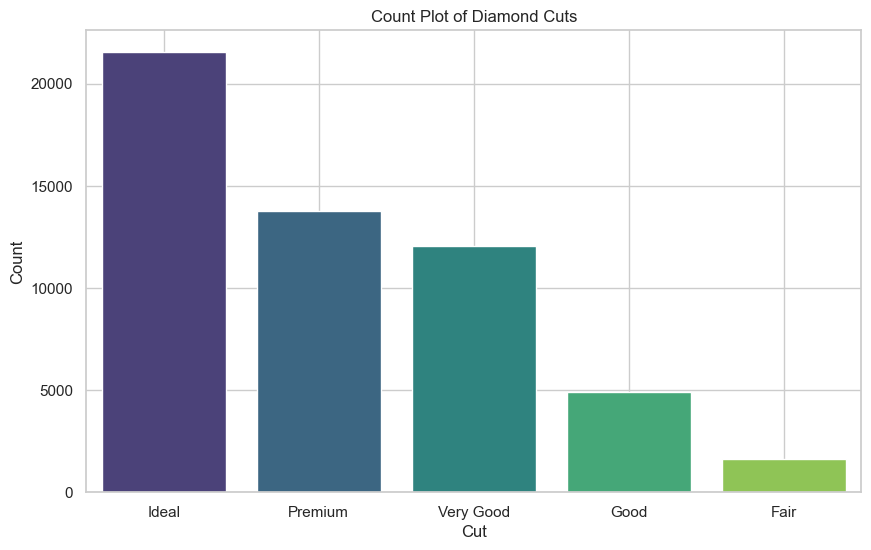

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(data=diamonds, x='cut', order=diamonds['cut'].value_counts().index, palette='viridis')
plt.title('Count Plot of Diamond Cuts')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.grid(True)
plt.show()


## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

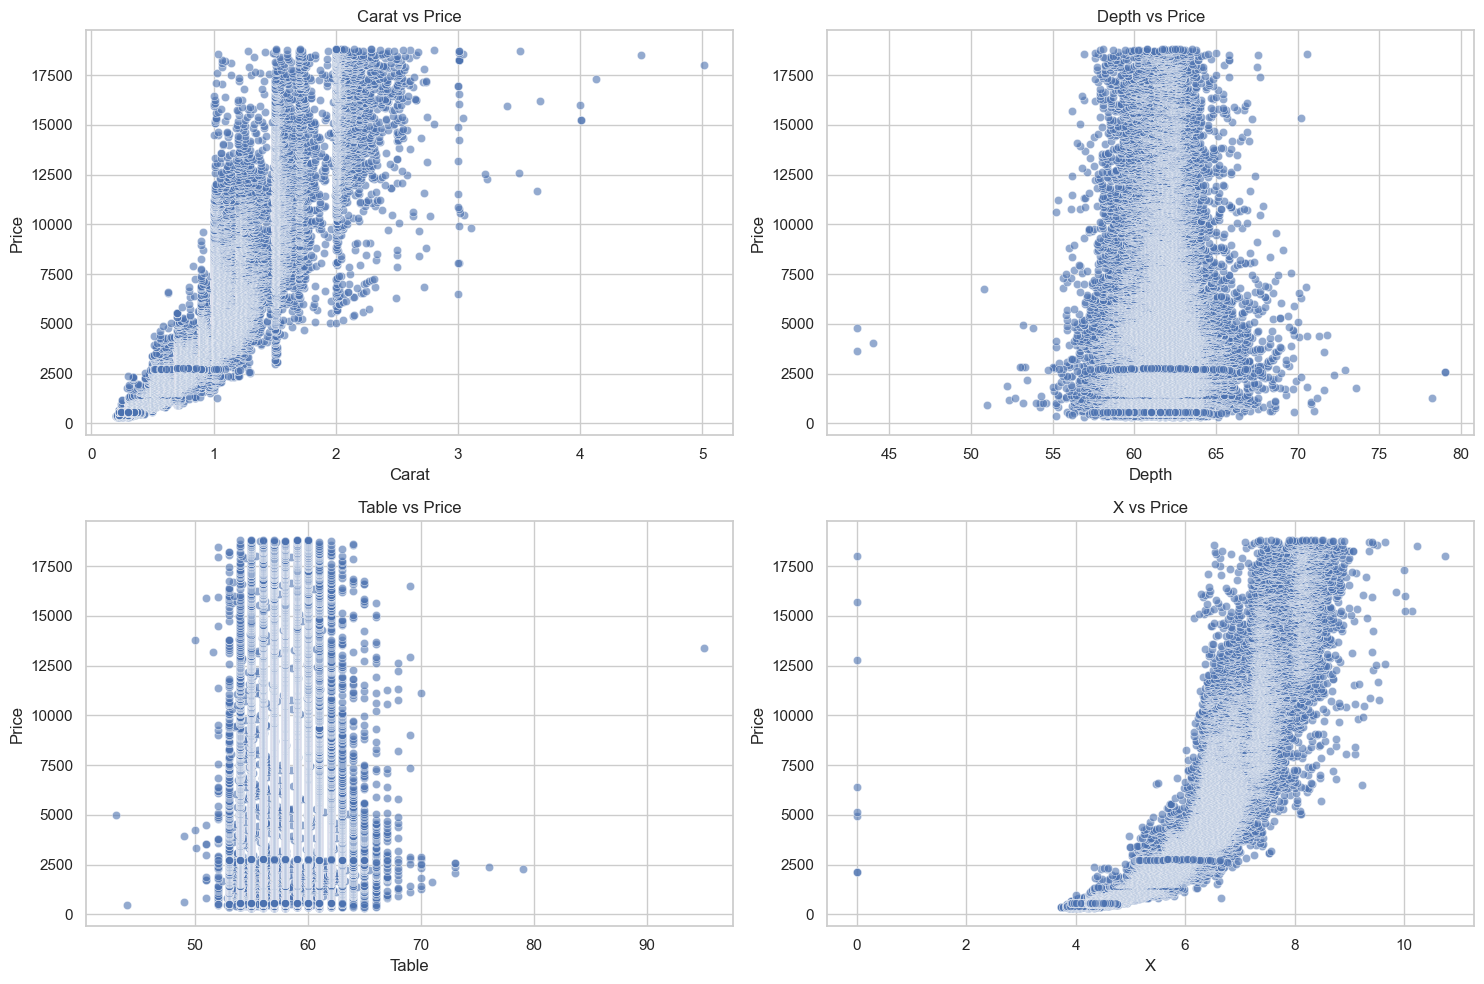

In [21]:
plt.figure(figsize=(15, 10))

# Scatter plot for Carat vs Price
plt.subplot(2, 2, 1)
sns.scatterplot(data=diamonds, x='carat', y='price', alpha=0.6)
plt.title('Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')

# Scatter plot for Depth vs Price
plt.subplot(2, 2, 2)
sns.scatterplot(data=diamonds, x='depth', y='price', alpha=0.6)
plt.title('Depth vs Price')
plt.xlabel('Depth')
plt.ylabel('Price')

# Scatter plot for Table vs Price
plt.subplot(2, 2, 3)
sns.scatterplot(data=diamonds, x='table', y='price', alpha=0.6)
plt.title('Table vs Price')
plt.xlabel('Table')
plt.ylabel('Price')

# Scatter plot for X vs Price
plt.subplot(2, 2, 4)
sns.scatterplot(data=diamonds, x='x', y='price', alpha=0.6)
plt.title('X vs Price')
plt.xlabel('X')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


### 3.2 Categorical & Categorical: stacked column chart

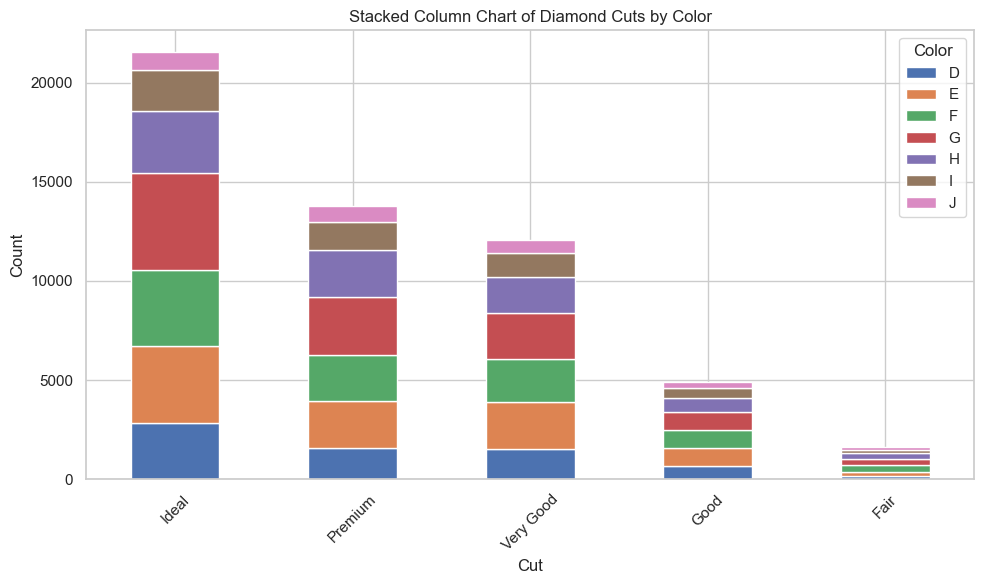

In [22]:
# Grouping the data by 'cut' and 'color' to get the counts for the stacked column chart
stacked_data = diamonds.groupby(['cut', 'color']).size().unstack()

# Plotting the stacked column chart
stacked_data.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Stacked Column Chart of Diamond Cuts by Color')
plt.xlabel('Cut')
plt.ylabel('Count')
plt.legend(title='Color')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.3 Categorical & Continuous: boxplots

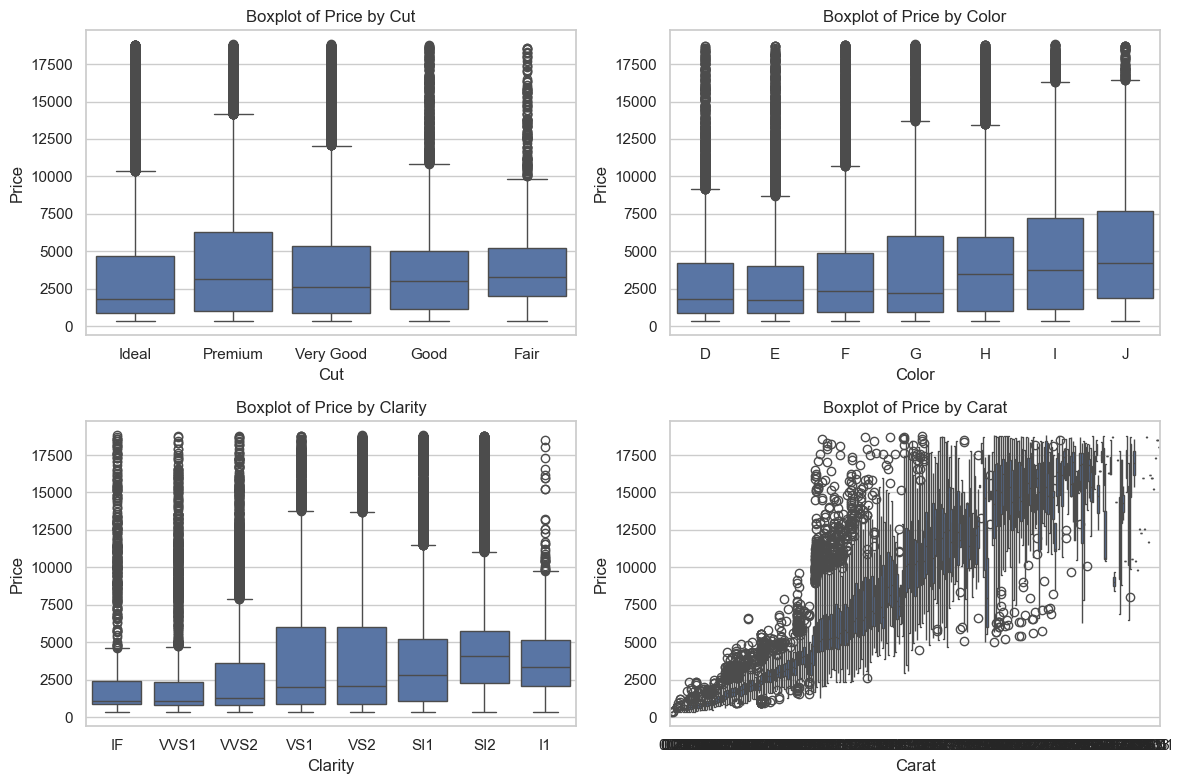

In [23]:
plt.figure(figsize=(12, 8))

# Boxplot for Price by Cut
plt.subplot(2, 2, 1)
sns.boxplot(data=diamonds, x='cut', y='price')
plt.title('Boxplot of Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Price')

# Boxplot for Price by Color
plt.subplot(2, 2, 2)
sns.boxplot(data=diamonds, x='color', y='price')
plt.title('Boxplot of Price by Color')
plt.xlabel('Color')
plt.ylabel('Price')

# Boxplot for Price by Clarity
plt.subplot(2, 2, 3)
sns.boxplot(data=diamonds, x='clarity', y='price')
plt.title('Boxplot of Price by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price')

# Boxplot for Price by Carat
plt.subplot(2, 2, 4)
sns.boxplot(data=diamonds, x='carat', y='price')
plt.title('Boxplot of Price by Carat')
plt.xlabel('Carat')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


### 3.4 Correlation Analysis: correlation matrix

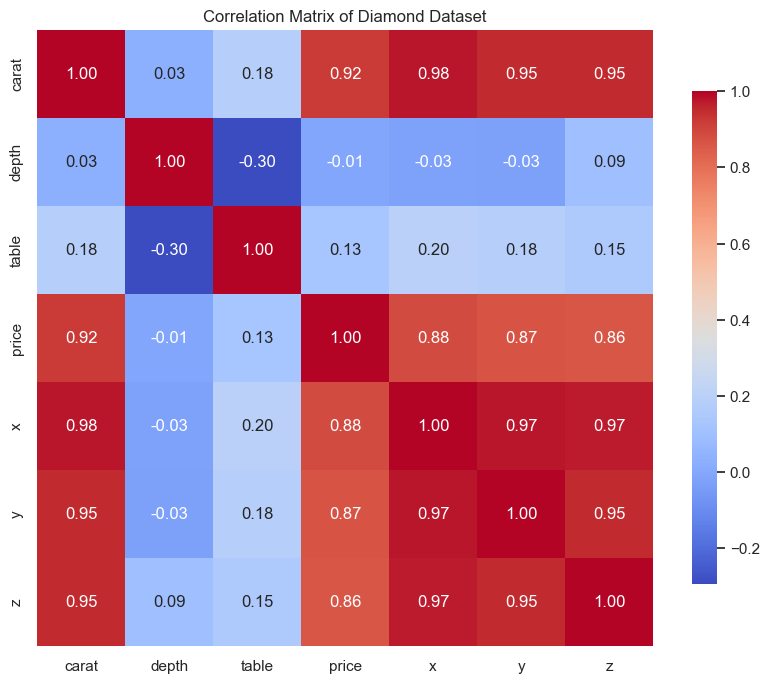

In [25]:
# To calculate the correlation matrix, we need to select only the numeric columns from the diamonds DataFrame.
correlation_matrix = diamonds.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Diamond Dataset')
plt.show()


## 4.0 Missing Value Analysis

In [14]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5.0 Outlier Analysis

## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [15]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64